<a href="https://colab.research.google.com/github/maryadriennerdrgz/CpE-AIML/blob/main/58034_Lab03_LakadMatatag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [2]:
### YOUR CODE HERE
class LinearRegression_Simple():

  def covariance(self, X, y):
    self.X1 = X - X.mean()
    self.y1 = y - y.mean()
    self.sum = sum([self.X1[i]*self.y1[i] for i in range(len(self.X1))])
    c = len(X) - 1
    covar = self.sum/c

    return print("covariance(X, y) =", covar)

  def pearsons_r(self, X, y):
    stdX1 = sum([self.X1[i] ** 2.0 for i in range(len(self.X1))])
    stdy1 = sum([self.y1[i] ** 2.0 for i in range(len(self.y1))])
    stdXy1 = (stdX1 * stdy1) ** (1 / 2)
    self.correlation = self.sum/stdXy1

    return print("r =", self.correlation)

  def train(self, X, y):
    stdX2 = np.std(X) 
    stdy2 = np.std(y)
    self.w1 = self.correlation * (stdy2 / stdX2)
    self.w0 = y.mean() - self.w1 * X.mean()
    self.model_ = print("w1:", self.w1, "\nw0:", self.w0,)

    return self.model_

  def predict(self, x):
    self.pred = self.w0 + np.dot(self.w1, x.reshape(x.size, 1))
    index = np.array(list(range(0, self.pred.size)))

    return print("y_hat(i)=",np.array(self.pred), "\ni = ",index)

  def evaluate(self):
    n = y.size 
    k = 1
    self.predsize = self.pred.size

    SST = np.sum(np.square(y-y.mean()))
    SSR = np.sum(np.square(self.pred-y.mean()))
    SSE = np.sum(np.square(self.pred-y[0:self.predsize]))
    MSE = np.mean(np.square(self.pred - y[0:self.predsize]))
    RMSE = np.sqrt(MSE)
    r_squared = 1 - (SSE/SST)
    ar_squared = 1 - ((1 - r_squared)*(n - 1)/(n-k-1))
    model_stats1 = {'SST' : SST,
                    'SSR' : SSR,
                    'SSE' : SSE,
                    'MSE' : MSE,
                    'RMSE' : RMSE,
                    'R-squared' : r_squared,
                    'Adjusted R-squared' : ar_squared
                   }

    return model_stats1

  def visualize(self):
    plt.scatter(X[0:self.predsize], y[0:self.predsize])
    plt.plot(X[0:self.predsize], self.pred, color='red')
    plt.grid()
    plt.savefig("Regression.jpg", dpi = 400)

    plt.show()

  ### You may add other helper functions in to make your code cleaner

In [3]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [4]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [5]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X, y)
cov

covariance(X, y) = -456.66330121164833


Expected output value:
$$cov_{x,y} = -456.66$$

In [6]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

r = -0.9050803915258334


Expected output value:
$$r = -0.90$$

In [7]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

w1: -0.5425702588653247 
w0: -9.378797103736638


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [8]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

y_hat(i)= [[-63.63582299]
 [-64.17839325]
 [-64.72096351]
 [-65.26353377]
 [-65.80610403]] 
i =  [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [9]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': -1.5429531200388182,
 'MSE': 3015.103360869995,
 'R-squared': -1.5172667248869112,
 'RMSE': 54.90995684636799,
 'SSE': 75377.58402174988,
 'SSR': 4059.902457360765,
 'SST': 29944.21817780801}

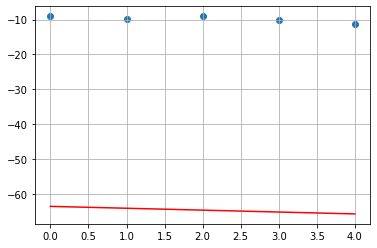

In [10]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()